In [2]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/Users/juhimishra/Downloads/Malignant Comments Classifier Project/train.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('/Users/juhimishra/Downloads/Malignant Comments Classifier Project/test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
print('Total no of Train rows: ',df_train.shape[0])
print('Total no of Train columns: ',df_train.shape[1])
print('Total no of test rows',df_test.shape[0])
print('Total no of Test columns',df_test.shape[1])

Total no of Train rows:  159571
Total no of Train columns:  8
Total no of test rows 153164
Total no of Test columns 2


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,db8109ac131deaa4,*i was quitely creating the pages. Not making ...
freq,1,1


In [10]:
# checking null value
df_train.isnull().sum().to_frame('Missing Values')

,Missing Values
id,0
comment_text,0
malignant,0
highly_malignant,0
rude,0
threat,0
abuse,0
loathe,0


In [11]:
df_test.isnull().sum().to_frame('Missing Values')

,Missing Values
id,0
comment_text,0


In [12]:
import pandas as pd
df_train['label'] = 0
for ind in df_train.index:
    if df_train['malignant'][ind] or  df_train['highly_malignant'][ind] or df_train['rude'][ind] or df_train['threat'][ind] or df_train['abuse'][ind] or df_train['loathe'][ind]:
        df_train.at[ind, 'label'] = 1
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


### Univariate analysis

In [13]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

<AxesSubplot:xlabel='malignant', ylabel='count'>

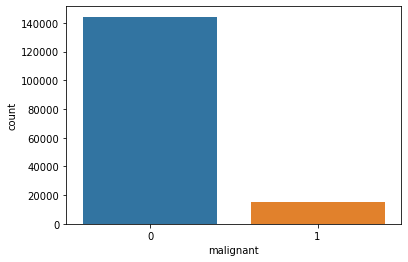

In [14]:
sns.countplot('malignant',data=df_train)

In [15]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

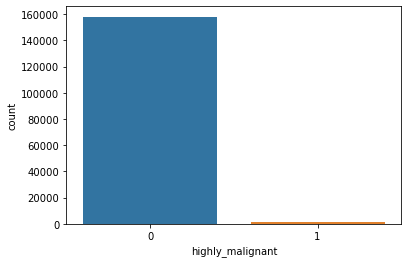

In [16]:
sns.countplot('highly_malignant',data=df_train)

<AxesSubplot:xlabel='rude', ylabel='count'>

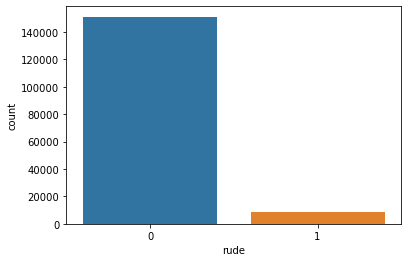

In [17]:
sns.countplot('rude',data=df_train)

<AxesSubplot:xlabel='threat', ylabel='count'>

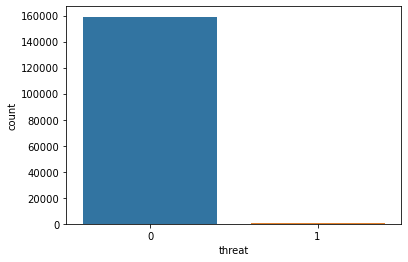

In [18]:
sns.countplot('threat',data=df_train)

<AxesSubplot:xlabel='abuse', ylabel='count'>

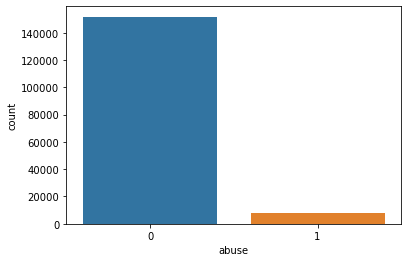

In [19]:
sns.countplot('abuse',data=df_train)

<AxesSubplot:xlabel='loathe', ylabel='count'>

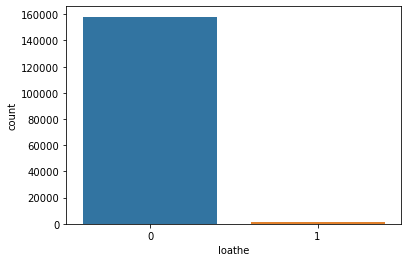

In [20]:
sns.countplot('loathe',data=df_train)

<AxesSubplot:xlabel='label', ylabel='count'>

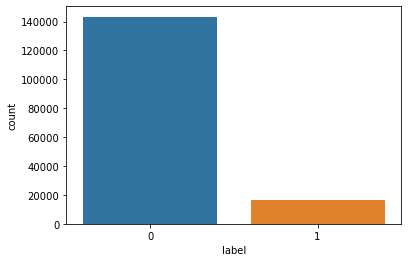

In [21]:
sns.countplot('label',data=df_train)

In [22]:
df_train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

This dataset is an imbalanced dataset as we can see that here difference between 0 and 1 is too high. To balance this either need to use oversampling or undersampling.

### Feature Engineering

In [23]:
le = LabelEncoder()

In [24]:
df1 =le.fit_transform(df_train['comment_text'])
df_train['comment_text']=df1

In [25]:
df2 =le.fit_transform(df_train['id'])
df_train['id']=df2

In [26]:
df3 =le.fit_transform(df_test['comment_text'])
df_test['comment_text']=df3
df4 =le.fit_transform(df_test['id'])
df_test['id']=df4

### Checking skewness and outliers

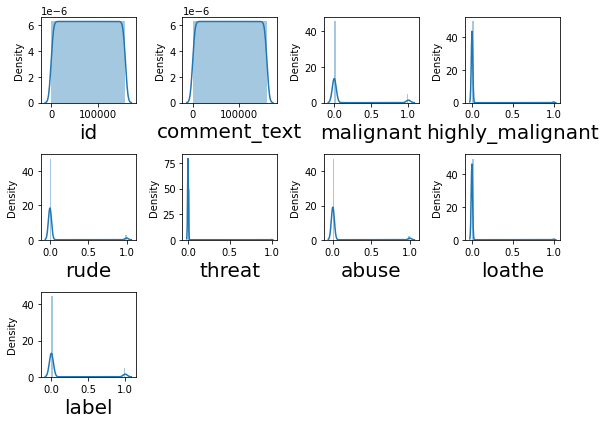

In [27]:
plt.figure(figsize = (8,6),facecolor = 'white')
plotnumber = 1

for column in df_train:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

Mainly skewness we check for continous columns and here id and comment text is not a continous data . Rest all continous data do have right side skewness 

In [28]:
df_train.skew()

id                  7.386055e-17
comment_text        1.282301e-19
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
label               2.635944e+00
dtype: float64

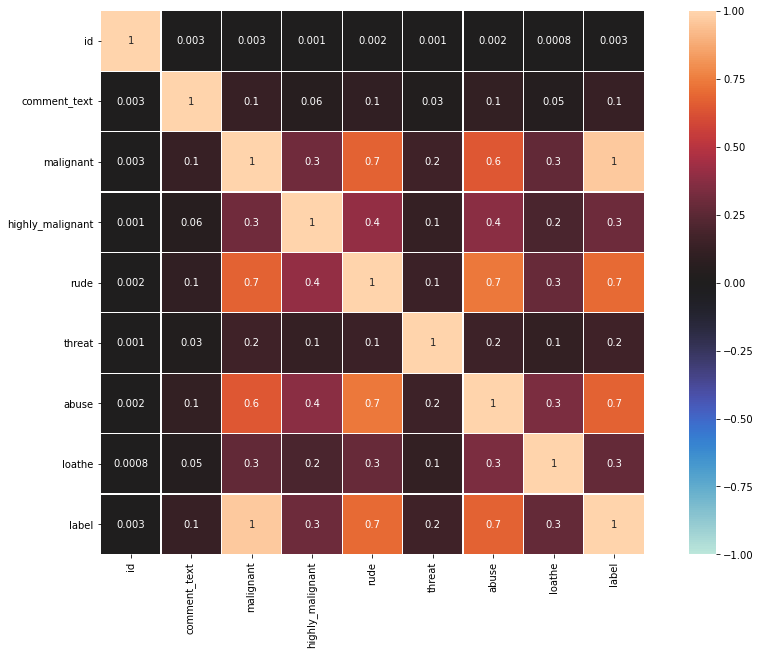

In [29]:
# Checking correlation with the help of heatmap
df_corr = df_train.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [30]:
# Dropping id column from train dataset as having least correlation with our target column

df_train.drop(columns=['id'],inplace = True)


### Balancing data using Smote (Oversampling the data So that no data loss will be there)

In [31]:
## Splitting target and feature variable into x and y
x = df_train.drop(columns=['label'])
y= df_train['label']

In [32]:
x.shape

(159571, 7)

In [33]:
y.shape

(159571,)

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [35]:
x1,y1 = sm.fit_resample(x,y)

In [36]:
y1.value_counts()

1    143346
0    143346
Name: label, dtype: int64

In [37]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[-0.32673721, -0.90314283, -0.12845747, ..., -0.05456354,
        -0.41067574, -0.1008587 ],
       [-0.42049935, -0.90314283, -0.12845747, ..., -0.05456354,
        -0.41067574, -0.1008587 ],
       [-0.17772045, -0.90314283, -0.12845747, ..., -0.05456354,
        -0.41067574, -0.1008587 ],
       ...,
       [-0.53375295,  1.10724457, -0.12845747, ..., -0.05456354,
         2.43501114, -0.1008587 ],
       [-1.59822008,  1.10724457, -0.12845747, ..., -0.05456354,
        -0.41067574, -0.1008587 ],
       [-0.43419955,  1.10724457, -0.12845747, ..., -0.05456354,
        -0.41067574, -0.1008587 ]])

### Finding Best Random State

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [39]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    acc = accuracy_score(y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.9655264626546368 On Random state:  152


In [41]:
# Importing important algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importing metrices
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [49]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=i,test_size=0.30)

In [50]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     42954
           1       0.96      0.96      0.96     43054

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008



In [42]:
print(cross_val_score(DTC,x_scaler,y1,cv=5).mean())

0.9632288098410449


In [52]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     42954
           1       0.96      0.97      0.96     43054

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008



In [44]:
print(cross_val_score(RFC,x_scaler,y1,cv=6).mean())

0.9632637115789767


In [42]:
LR = LogisticRegression()
LR.fit(x1_train,y1_train)
pred = LR.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42954
           1       1.00      0.95      0.97     43054

    accuracy                           0.97     86008
   macro avg       0.97      0.97      0.97     86008
weighted avg       0.97      0.97      0.97     86008



In [43]:
print(cross_val_score(LR,x_scaler,y1,cv=6).mean())

0.9739127704993513


In [44]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x1_train, y1_train)
pred = xgb.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

[19:04:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42954
           1       1.00      0.95      0.97     43054

    accuracy                           0.97     86008
   macro avg       0.97      0.97      0.97     86008
weighted avg       0.97      0.97      0.97     86008



In [45]:
print(cross_val_score(xgb,x_scaler,y1,cv=5).mean())

[19:04:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:04:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

### ROC AUC Curve

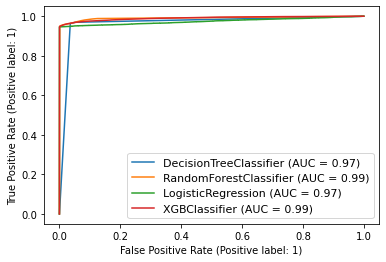

In [53]:
disp = plot_roc_curve(DTC,x1_test,y1_test)

plot_roc_curve(RFC,x1_test,y1_test,ax = disp.ax_) # ax = axes with confusion mtrix

plot_roc_curve(LR,x1_test,y1_test,ax = disp.ax_)

plot_roc_curve(xgb,x1_test,y1_test,ax = disp.ax_)

plt.legend(prop={'size':11}, loc = 'lower right')

plt.show()

### Hyperparameter Tuning

In [54]:
# Logistic Regression

# Logistic Regression
param = ({'C':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.010],
         'max_iter':[100,500,700,900],
         'penalty':['l1','l2','elasticnet','none'],
         'solver':['newton-cg','lbfgs','liblinear','sag','saga']
        })

In [55]:
GC = GridSearchCV(LR,param,cv=5)

In [ ]:
GC.fit(x1_train,y1_train)

### Save the Model

In [58]:
import joblib
joblib.dump(LR,'FinalmodelMalignant.pk1')

['FinalmodelMalignant.pk1']

In [60]:
# prediction using the same model
loaded_model = joblib.load(open('FinalmodelMalignant', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'FinalmodelMalignant'